In [73]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [74]:
dataset = pd.read_csv("Supply_Chain_Data.csv")
dataset

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

In [76]:
dataset.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
# Check for missing values
print(dataset.isnull().sum())

Product_type               0
SKU                        0
Price                      0
Availability               0
Number_of_products_sold    0
Revenue_generated          0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier_name              0
Location                   0
Lead time                  0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Inspection_results         0
Defect_rates               0
Transportation_modes       0
Routes                     0
Costs                      0
dtype: int64


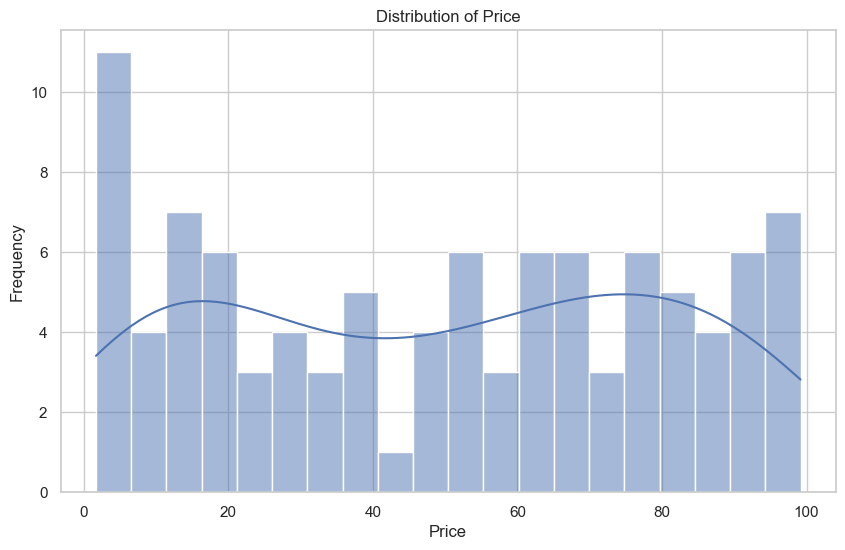

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Price', bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

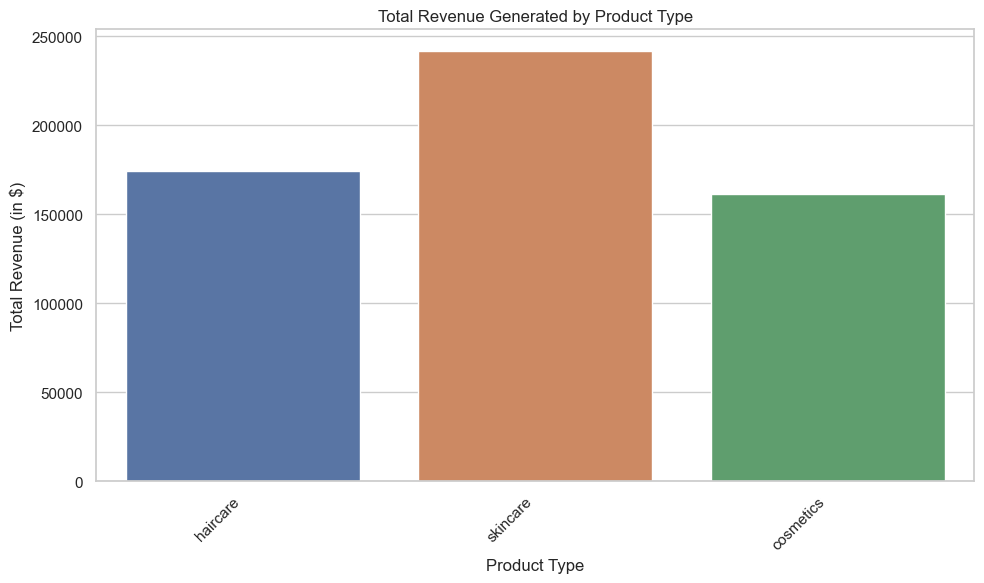

In [80]:
# Plotting revenue generated by product type
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='Product_type', y='Revenue_generated', estimator=sum, ci=None)
plt.title('Total Revenue Generated by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

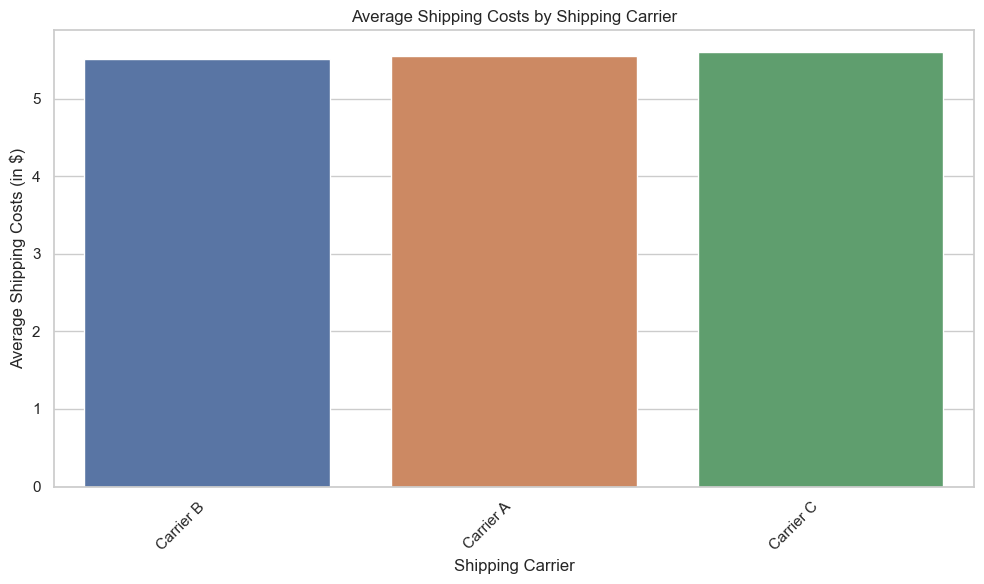

In [81]:
# Plotting average shipping costs by shipping carrier
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='Shipping_carriers', y='Shipping_costs', estimator='mean', ci=None)
plt.title('Average Shipping Costs by Shipping Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Average Shipping Costs (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

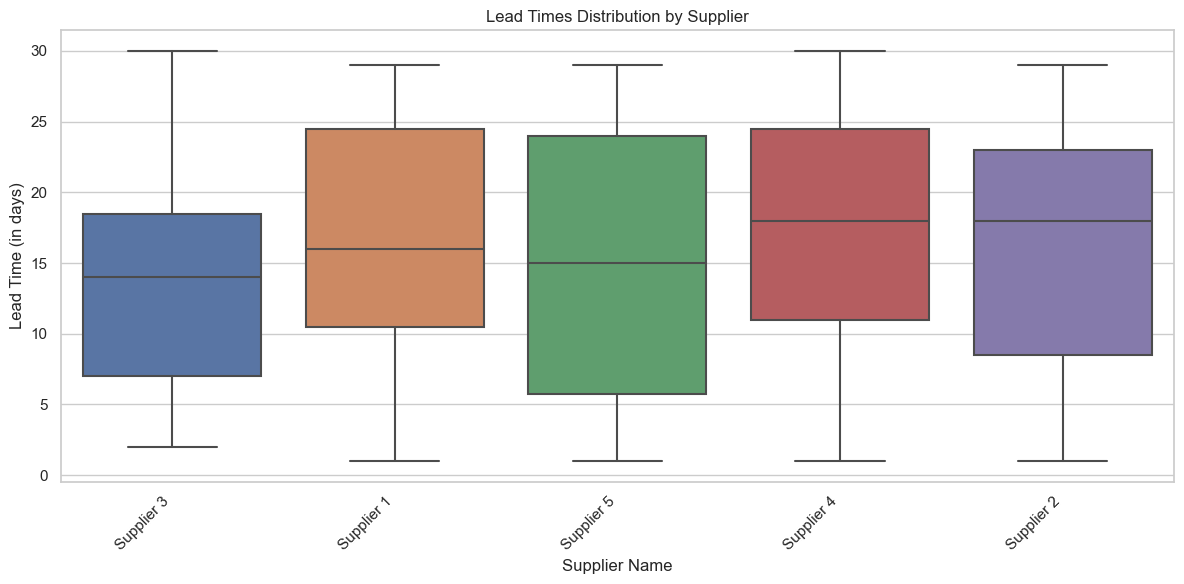

In [82]:
# Plotting lead times distribution by supplier
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Supplier_name', y='Lead_times')
plt.title('Lead Times Distribution by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Lead Time (in days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

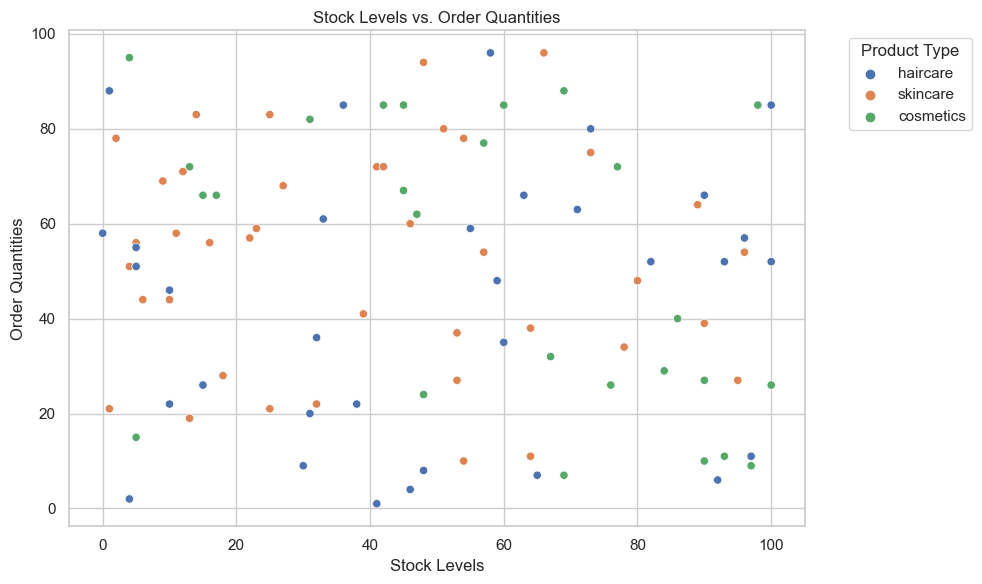

In [83]:
# Plotting stock levels vs. order quantities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Stock_levels', y='Order_quantities', hue='Product_type')
plt.title('Stock Levels vs. Order Quantities')
plt.xlabel('Stock Levels')
plt.ylabel('Order Quantities')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

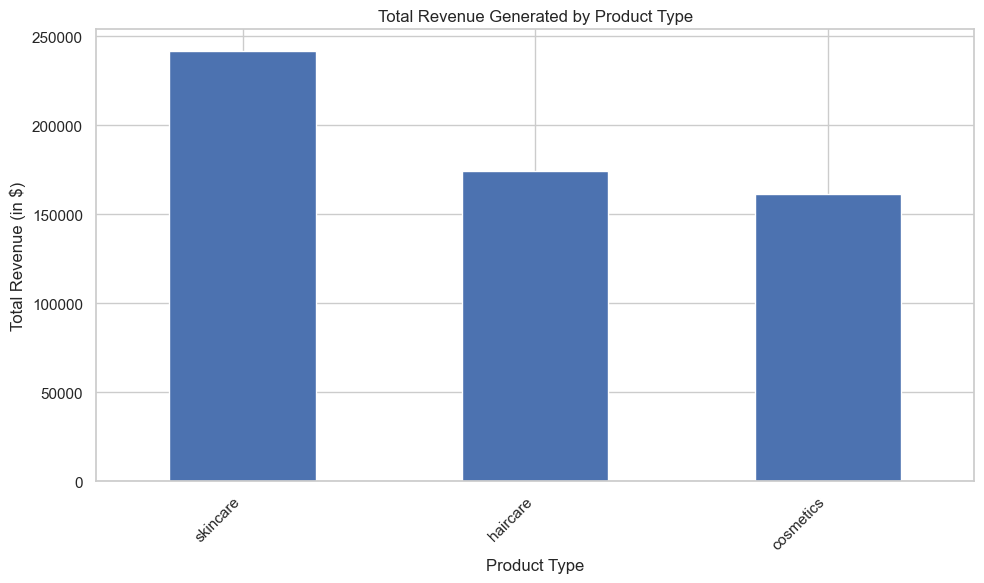

In [84]:
# Bar graph: Total revenue generated by product type
plt.figure(figsize=(10, 6))
total_revenue_by_product = dataset.groupby('Product_type')['Revenue_generated'].sum().sort_values(ascending=False)
total_revenue_by_product.plot(kind='bar')
plt.title('Total Revenue Generated by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

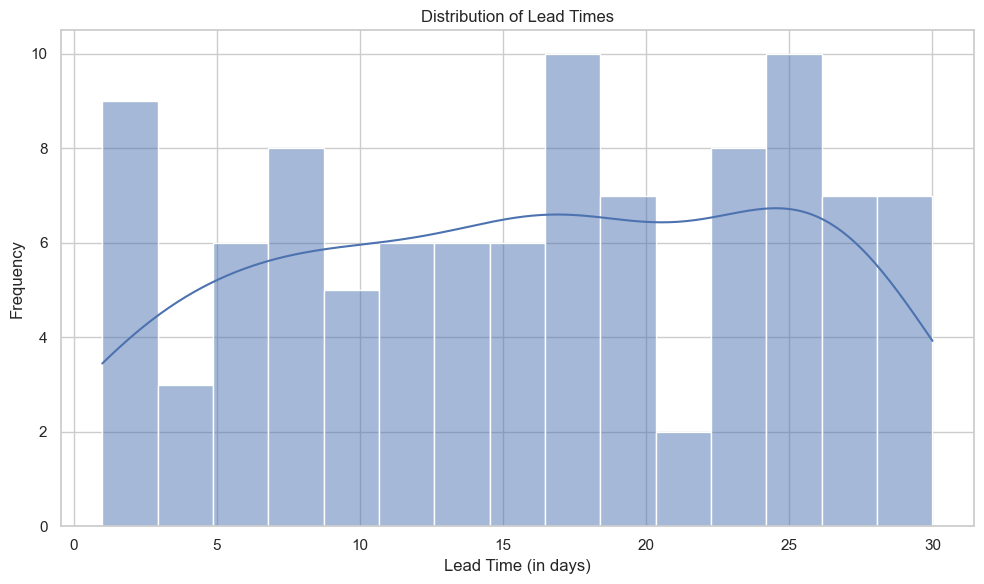

In [85]:
# Histogram: Distribution of lead times
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Lead_times'], bins=15, kde=True)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (in days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


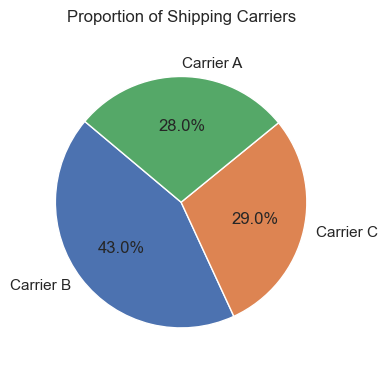

In [86]:
# Pie chart: Proportion of shipping carriers
plt.figure(figsize=(4, 4))
shipping_carriers_proportion = dataset['Shipping_carriers'].value_counts()
plt.pie(shipping_carriers_proportion, labels=shipping_carriers_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Shipping Carriers')
plt.axis('equal')
plt.tight_layout()
plt.show()

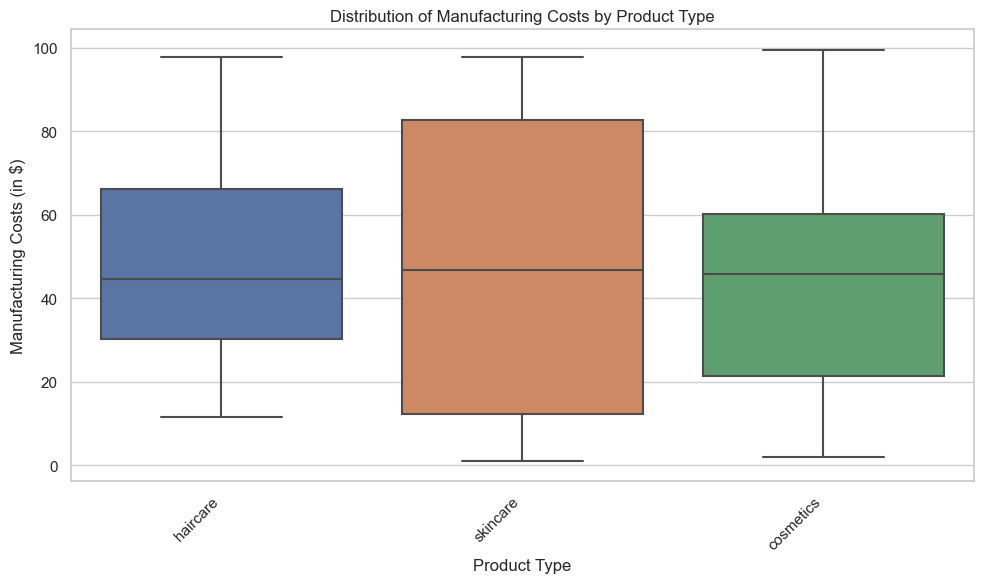

In [87]:
# Boxplot: Distribution of Manufacturing Costs by Product Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Product_type', y='Manufacturing_costs')
plt.title('Distribution of Manufacturing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Manufacturing Costs (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

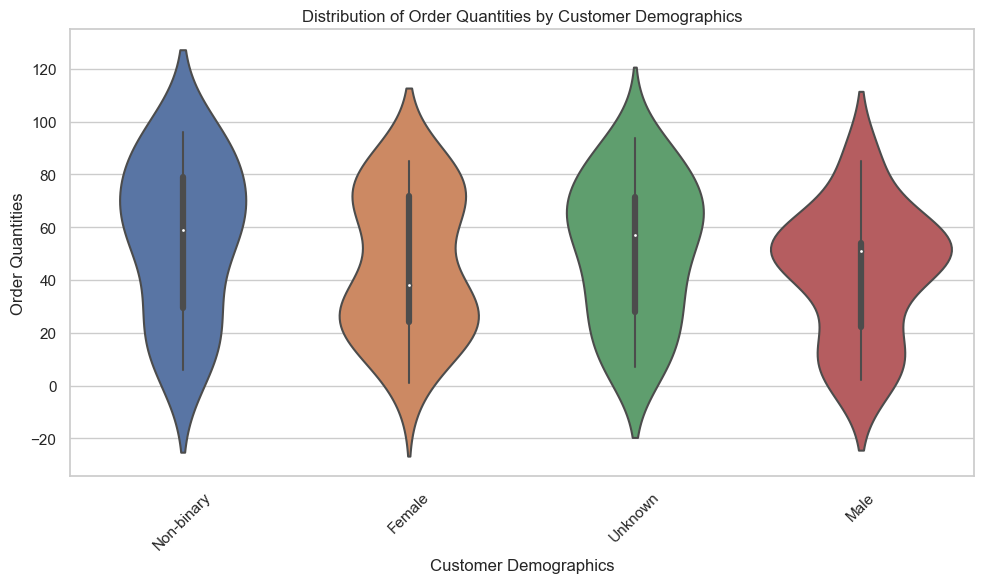

In [88]:
# Violin Plot: Distribution of Order Quantities by Customer Demographics
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset, x='Customer_demographics', y='Order_quantities')
plt.title('Distribution of Order Quantities by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Order Quantities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
# Convert categorical variables using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['Product_type', 'Customer_demographics', 'Shipping_carriers', 'Supplier_name', 'Location', 'Inspection_results', 'Routes'])


In [94]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Price', 'Availability', 'Number_of_products_sold', 'Revenue_generated', 'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times', 'Lead_times', 'Production_volumes', 'Manufacturing_lead_time', 'Manufacturing_costs', 'Costs']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])


In [96]:
# Select numerical columns for training
numerical_columns = ['Price', 'Availability', 'Number_of_products_sold', 'Revenue_generated', 'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times', 'Lead_times', 'Production_volumes', 'Manufacturing_lead_time', 'Manufacturing_costs']
X_train_val, X_test, y_train_val, y_test = train_test_split(dataset[numerical_columns], dataset['Costs'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [98]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [99]:
linear_model.score(X_train,y_train)

0.2850953654060807

In [100]:
# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_val, y_pred_linear)
print("Linear Regression - Mean Squared Error on Validation Set:", mse_linear)

# Make predictions on the test set
y_pred_test_linear = linear_model.predict(X_test)

# Evaluate the model on the test set
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
print("Linear Regression - Mean Squared Error on Test Set:", mse_test_linear)

Linear Regression - Mean Squared Error on Validation Set: 1.9675613728948262
Linear Regression - Mean Squared Error on Test Set: 1.9987897979142926


In [101]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
rf_model.score(X_train,y_train)

0.853576981023895

In [103]:
# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest Regressor model
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Random Forest Regressor - Mean Squared Error on Validation Set:", mse_rf)

# Make predictions on the test set
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
print("Random Forest Regressor - Mean Squared Error on Test Set:", mse_test_rf)

Random Forest Regressor - Mean Squared Error on Validation Set: 1.6936022011736926
Random Forest Regressor - Mean Squared Error on Test Set: 1.8871462704586168


In [104]:
# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [105]:
gb_model.score(X_train,y_train)

0.9944187208756616

In [106]:
# Make predictions on the validation set
y_pred_gb = gb_model.predict(X_val)

# Evaluate the Gradient Boosting Regressor model
mse_gb = mean_squared_error(y_val, y_pred_gb)
print("Gradient Boosting Regressor - Mean Squared Error on Validation Set:", mse_gb)

# Make predictions on the test set
y_pred_test_gb = gb_model.predict(X_test)

# Evaluate the model on the test set
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
print("Gradient Boosting Regressor - Mean Squared Error on Test Set:", mse_test_gb)

Gradient Boosting Regressor - Mean Squared Error on Validation Set: 1.7985447850215532
Gradient Boosting Regressor - Mean Squared Error on Test Set: 1.9433055896814415
